<h1 align="center">Урок 8. Дисперсионный анализ. Логистическая регрессия</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180. Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

$ H_0: \mu_1 = \mu_2 = \mu_3$

$ H_1: \mu_1 \ne \mu_2\ or\ \mu_1 \ne \mu_3\ or\ \mu_2 \ne \mu_3$

$ \alpha: 0.05$

In [2]:
football_players = [173, 175, 180, 178, 177, 185, 183, 182]
hockey_players = [177, 179, 180, 188, 177, 172, 171, 184, 180]
weightlifters = [172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170]
sportsmen = pd.DataFrame({"sportsman": ["football_player"]*len(football_players) + 
                          ["hockey_player"]*len(hockey_players) + ["weightlifter"]*len(weightlifters),
                         "height": football_players + hockey_players + weightlifters})
alpha_list = [0.01, 0.05, 0.1]

In [3]:
sportsmen.sample(5, random_state=42)

,sportsman,height
9,hockey_player,179
25,weightlifter,172
8,hockey_player,177
21,weightlifter,166
0,football_player,173


In [4]:
sportsmen.groupby("sportsman")[["height"]].mean().rename(columns = {"height": "mean by height"})

,mean by height
sportsman,
football_player,179.125000
hockey_player,178.666667
weightlifter,172.727273


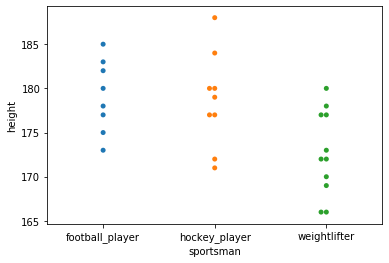

In [5]:
sns.swarmplot(x='sportsman', y='height', data=sportsmen)

Проверим условия использования дисперсионного анализа: <br />
1) Проверка выборочных распределений на нормальность

In [6]:
stats.shapiro(football_players)[1], stats.shapiro(hockey_players)[1], stats.shapiro(weightlifters)[1]

(0.9495397210121155, 0.7763133645057678, 0.5051169991493225)

Нельзя отклонить нулевые гипотезы о нормальности распределений.<br />
2) Оценим однородность дисперсий с помощью критерия Бартлетта

In [7]:
stats.bartlett(football_players, hockey_players, weightlifters)

BartlettResult(statistic=0.4640521043406442, pvalue=0.7929254656083131)

Принимаем нулевую гипотезу об однородности дисперсий.<br />
Проведём однофакторный дисперсионный анализ:

In [8]:
F = stats.f_oneway(football_players, hockey_players, weightlifters)
F

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

In [9]:
for alpha in alpha_list:
    print(f"При alpha = {alpha} различия статистически {'' if F.pvalue < alpha else 'не'}значимы.")

При alpha = 0.01 различия статистически незначимы.
При alpha = 0.05 различия статистически значимы.
При alpha = 0.1 различия статистически значимы.


Вывод: Принадлежность к виду спорта взаимосвязана с фактором роста.